In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]
mlen = 3 # number states
excludedvids=[111]


In [3]:

def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    vidarrs = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'Processing' in line:
                vidnum = line.split('pp_')[-1]
                vidnum = vidnum.split('.avi')[0]
                vidnum = vidnum.split('_')[0]
                vidnum = int(vidnum)
                #print(vidnum)
                line = textfile.readline()
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                        
                
                    if len(thresholds) ==0 or thresholds[-1] != thresh_set:
                        #print(thresh_set)
                        thresholds.append(thresh_set)
                        vidnums=[]
                        vidarrs.append([[], vidnums])
                        vidsarr = np.zeros((mlen,mlen))
                        transitions.append(vidsarr)
                    else:
                        pass    
                    
                    line = textfile.readline()
                    #print('array lives here', line)
                    if '[[' in line:
                        arr = np.zeros((mlen,mlen))
                        #print(arr)
                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[0,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[1,:] = linenums

                        line = textfile.readline()
                        #print('array lives here', line)   

                        linenums = [int(s) for s in  re.findall(r'\d+',line)]
                        #print(linenums)
                        arr[2,:] = linenums

                        transitions[-1] += arr
                        vidarrs[-1][0].append(arr)
                        vidarrs[-1][1].append(vidnum)
                        #print(arr,'\n', transitions[-1])
                    else:
                        print("missing array")
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                
                
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds), vidarrs]) 

In [4]:

cols = [ 'mediumslateblue','fuchsia','darkviolet' ]

In [5]:

print(parser_arr(glob('./output wash*halftrimmed.txt')[0]))


[[array([[ 16.,   0.,  11.],
       [  0.,  10.,   4.],
       [ 11.,   4., 234.]]), array([[  2.,   0.,   8.],
       [  0.,   1.,   3.],
       [  6.,   3., 161.]]), array([[  1.,   0.,   5.],
       [  0.,   1.,   2.],
       [  3.,   2., 113.]]), array([[ 16.,   0.,  11.],
       [  0.,  10.,   4.],
       [ 11.,   4., 166.]]), array([[  2.,   0.,   8.],
       [  0.,   1.,   3.],
       [  6.,   3., 132.]]), array([[  1.,   0.,   5.],
       [  0.,   1.,   2.],
       [  3.,   2., 104.]]), array([[ 16.,   0.,  11.],
       [  0.,   9.,   4.],
       [ 11.,   4., 130.]]), array([[  2.,   0.,   8.],
       [  0.,   1.,   3.],
       [  6.,   3., 113.]]), array([[ 1.,  0.,  5.],
       [ 0.,  1.,  2.],
       [ 3.,  2., 94.]]), array([[ 15.,   0.,  11.],
       [  0.,   9.,   4.],
       [ 11.,   4., 111.]]), array([[ 2.,  0.,  8.],
       [ 0.,  1.,  3.],
       [ 6.,  3., 98.]]), array([[ 1.,  0.,  5.],
       [ 0.,  1.,  2.],
       [ 3.,  2., 88.]])], array([[25.        , 20.    


len indices 10
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[[  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0. 107.]] counts [  0.   0. 100.]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. 14.]] counts [  0.   0. 100.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 9.]] counts [  0.   0. 100.]
[[ 1.  0.  6.]
 [ 0.  0.  2.]
 [ 7.  2. 54.]] counts [ 8.46560847  1.05820106 90.47619048]
[[ 5.  0.  1.]
 [ 0.  0.  0.]
 [ 1.  0. 13.]] counts [45.23809524  0.         54.76190476]
[[ 9.  0.  3.]
 [ 0.  0.  1.]
 [ 2.  1. 89.]] counts [25.72463768  0.36231884 73.91304348]
[[ 2.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0. 15.]] counts [33.33333333  0.         66.66666667]
[[  4.   0.   4.]
 [  0.   0.   0.]
 [  5.   0. 249.]] counts [25.98425197  0.         74.01574803]
[[  1.   0.   1.]
 [  1.   5.   0.]
 [  1.   1. 179.]] counts [22.40638428 27.96193984 49.63167587]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] counts [0. 0. 0.]
[[  0.   0.   1.]
 [  0.   3.   3.]
 [  1.   3. 159.]] counts [ 0.20449898 17.2801636  82.51533742]
Total transition

Text(0, 0.5, 'observed probability of transition')

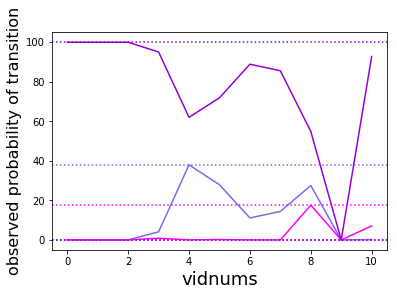

In [6]:
#broad observations array
trans_runs= parser_arr(glob('./output wash*half.txt')[0])
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row
    
def col_norm(array):
    cols = array.T
    cols = np.array([ratio(j)*100 for j in cols])
    return cols.T
    
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(row_norm(vidarrs))
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            print(T_obb, 'counts', counts)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
        print('Total transitions: ',np.sum(vidarrs), np.sum(vidarrs, axis=0), '\n')
#print(t_threshes,c_threshes)    

# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=0))
y_values_selected = col_norm(y_values_selected)
print('\nsummed y values\n', y_values_selected, '\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2,y3 = y_values_selected 
print('\nvidnums',vidnums,y1,y2,y3)
vidnums = list(range(len(y1)))
fig,ax = plt.subplots()
print('\n',len(vidnums), len(y1))        
plt.plot(vidnums, y1, c = cols[0], ls = '-')
plt.plot(vidnums, y2, c = cols[1], ls = '-')
plt.plot(vidnums, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('vidnums', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[22.0, 30.0, 38.0] [17.133099782815687, 11.786728565472547, 8.969620192533407] [4.413812203555177, 2.160521080114166, 0.8463401176457954] [78.45308801362913, 86.05275035441329, 90.18403968982079]
3 3


Text(0, 0.5, 'observed probability of transition')

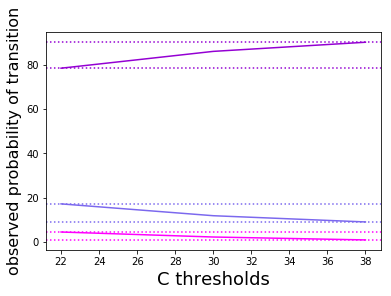

In [7]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        x3.append(counts[2])
    if len(x1) == len(vidnums):
        #vidarrs = np.cumsum(vidarrs, axis=0)
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby c threshold
stored_y_values = np.array(stored_y_values)
cs = list(set(c_threshes))
list.sort(cs)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
y3 = []
for j in cs:
    inds = np.where(np.array(c_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    y3.append(collected_value_across_all_vids[2])
print(cs,y1,y2,y3)
fig,ax = plt.subplots()
print(len(cs), len(y1))        
plt.plot(cs, y1, c = cols[0], ls = '-')
plt.plot(cs, y2, c = cols[1], ls = '-')
plt.plot(cs, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('C thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video

[20.0, 33.333333333333336, 46.66666666666667, 60.0] [11.929817828329947, 12.440780204647513, 12.584337583312324, 31.150793650793652] [2.9942635159795605, 2.3009551239331425, 2.419708908306115, 0.0] [85.07591865569049, 85.25826467141935, 84.99595350838156, 68.84920634920636]
4 4


Text(0, 0.5, 'observed probability of transition')

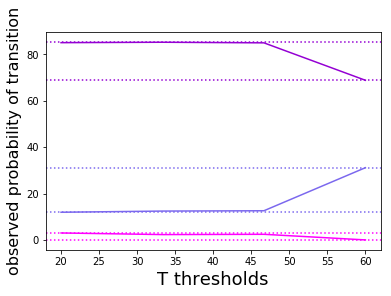

In [8]:
index = list(range(len(trans_runs[0])))

criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    vidarrs = np.array(trans_runs[2][i][0])
    vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
    #print(vidnums)
    inds=np.argsort(vidnums)
    #print(inds)
    vidarrs = vidarrs[inds]
    #print(vidarrs)
    #vidarrs = np.cumsum(vidarrs, axis=0)
    vidnums = list(range(len(vidarrs)))
    for vidnum in vidnums: 
        T_obb = vidarrs[vidnum]
        trans_matrices.append(T_obb)
        T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
        #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
        eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
        #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
              #np.sum(T_obb, axis=0))
        x1.append(counts[0])
        x2.append(counts[1])
        x3.append(counts[2])
    if len(x1) == len(vidnums):
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])
#print(t_threshes,c_threshes)    

# Print probabilitie sby t threshold
stored_y_values = np.array(stored_y_values)
ts = list(set(t_threshes))
list.sort(ts)
#print('\n', stored_y_values, '\n', c_threshes, '\n', cs, '\n')
y1 = []
y2 = []
y3 = []
for j in ts:
    inds = np.where(np.array(t_threshes) == j)
    y_values_selected = stored_y_values[inds] # matrix where each row is a t,c that includes the particular c threshold as the c
    #print('\noriginal y values\n', y_values_selected)
    y_values_selected = np.sum(y_values_selected, axis=0)
    #print('\nsummed y values\n',j, y_values_selected)    
    collected_value_across_all_vids = ratio([sum(i) for i in y_values_selected])*100
    #y1,y2,y3 = y_values_selected # one y value per video, and all only for this c threshold, summed over the t thresholds used
    #print(collected_value_across_all_vids, sum(collected_value_across_all_vids))
    y1.append(collected_value_across_all_vids[0])
    y2.append(collected_value_across_all_vids[1])
    y3.append(collected_value_across_all_vids[2])
print(ts,y1,y2,y3)
fig,ax = plt.subplots()
print(len(ts), len(y1))        
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('T thresholds', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
    
    
#Print probabilities by v threshold
    
    
    
# Printprobabilities by video


len indices 10
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13, 9, 12, 7, 8, 14, 2, 3, 4]
[10, 11, 13]
criteria ['20,22', '20,30', '20,38', '33,22', '33,30', '33,38', '46,22', '46,30', '46,38', '60,22']

stored_y_values [[[0.0, 0.0, 0.0, 8.465608465608465, 45.23809523809524, 25.724637681159418, 33.33333333333333, 25.984251968503933, 22.406384284837323, 0.0, 0.2044989775051125], [0.0, 0.0, 0.0, 1.0582010582010581, 0.0, 0.36231884057971014, 0.0, 0.0, 27.96193984039288, 0.0, 17.280163599182004], [100.0, 100.0, 100.0, 90.47619047619048, 54.761904761904766, 73.91304347826087, 66.66666666666666, 74.01574803149606, 49.6316758747698, 0.0, 82.51533742331289]], [[0.0, 0.0, 0.0, 2.5157232704402515, 37.17948717948718, 34.0375

Text(0, 0.5, 'observed probability of transition')

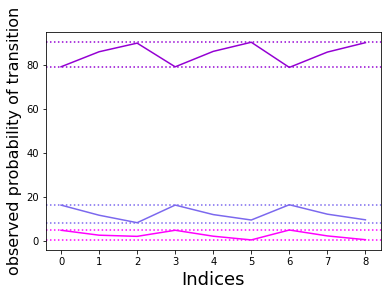

In [9]:
index = list(range(len(trans_runs[0])))
def row_norm(array):
    rows = np.array([ratio(j)*100 for j in array])
    return rows
criteria = []
#t_thresh_list = [20, 33, 46, 60]
stored_y_values = []
c_threshes = []
t_threshes = []
vidnumset = []
print('\nlen indices', len(index))
for i in index:
    x1 = []
    x2 = []
    x3 = []
    trans_matrices = []
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if True:#len(trans_runs[2][i][0]) == len(vidarrs):
        vidarrs = np.array(trans_runs[2][i][0])
        vidnums = [x for x in trans_runs[2][i][1] if x not in excludedvids]
        print(vidnums)
        inds=np.argsort(vidnums)
        #print(inds)
        vidarrs = vidarrs[inds]
        #print(vidarrs)
        #vidarrs = np.cumsum(vidarrs, axis=0)
        vidnums = list(range(len(vidarrs)))
        #print(vidnums)
        for vidnum in vidnums: 
            T_obb = vidarrs[vidnum]
            trans_matrices.append(T_obb)
            T_obb_norm = np.vstack([ratio(T_obb[i]) for i in range(len(T_obb))])
            #print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
            eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
            eig_one_index = [x for x in range(len(eigvals)) if eigvals[x]==max(eigvals)][0]
            eigvec_one = eigvecs[:, eig_one_index]
            evec_one = eigvec_one*100 / np.sum(eigvec_one)
            counts =  ratio(np.sum(T_obb_norm, axis=0))*100#/np.sum(T_obb_norm)
            #print('counts', counts)
            #print('\n y values incoming from e_vector\n',evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm), 
                  #np.sum(T_obb, axis=0))
            x1.append(counts[0])
            x2.append(counts[1])
            x3.append(counts[2])
        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        criteria.append(str(int(trans_threshes[0]))+','+str(int(trans_threshes[1])))
        stored_y_values.append([x1,x2,x3])#,x3])
#print(t_threshes,c_threshes)    
print('criteria', criteria)
# Print probabilitie sby video
#stored_y_values = [stored_y_values[x] for x in range(len(stored_y_values))]
stored_y_values = [z for z in stored_y_values if len(z[0]) == len(stored_y_values[0][0])] #np.array(stored_y_values)
print('\nstored_y_values',stored_y_values,'\n', len(stored_y_values), len(stored_y_values[0]), len(stored_y_values[0][1]),stored_y_values[0][1])
y_values_selected = np.array(np.sum(stored_y_values, axis=2))
print(y_values_selected)
y_values_selected = row_norm(y_values_selected)
print('\n','\nsummed y values\n', y_values_selected, y_values_selected.T,'\n', len(y_values_selected), len(y_values_selected[0]))
y1,y2,y3 = y_values_selected.T 

fig,ax = plt.subplots()
print(len(criteria), len(y1))   
ts = list(range(len(y1)))
plt.plot(ts, y1, c = cols[0], ls = '-')
plt.plot(ts, y2, c = cols[1], ls = '-')
plt.plot(ts, y3, c = cols[2], ls = '-')

plt.axhline(y=min(y1), c = cols[0], ls = ':')
plt.axhline(y=min(y2), c = cols[1], ls = ':')
plt.axhline(y=min(y3), c = cols[2], ls = ':')
plt.axhline(y=max(y1), c = cols[0], ls = ':')
plt.axhline(y=max(y2), c = cols[1], ls = ':')
plt.axhline(y=max(y3), c = cols[2], ls = ':')
plt.xlabel('Indices', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)


In [10]:
v1 = y1
v2 = y2
v3=y3

In [11]:
x = np.array([[  0.   ,        0.    ,       0.    ,      36.77828063 ,341.91849817,
 251.16042973, 100.    ,     129.81834646, 247.66580148 ,  0.,
   1.30671201], [  0. ,          0.      ,     0.     ,      7.76398098 ,  0.,
   1.7259552  ,  0.   ,        0.   ,      158.35761075  , 0.,
  63.60027952], [900. ,        900.     ,    900.      ,   855.45773839, 558.08150183,
 647.11361507 ,800.   ,      770.18165354 ,493.97658777 ,  0.,
 835.09300846]])
print(x,'\n', x.T, (x.T).T*100)

[[  0.           0.           0.          36.77828063 341.91849817
  251.16042973 100.         129.81834646 247.66580148   0.
    1.30671201]
 [  0.           0.           0.           7.76398098   0.
    1.7259552    0.           0.         158.35761075   0.
   63.60027952]
 [900.         900.         900.         855.45773839 558.08150183
  647.11361507 800.         770.18165354 493.97658777   0.
  835.09300846]] 
 [[  0.           0.         900.        ]
 [  0.           0.         900.        ]
 [  0.           0.         900.        ]
 [ 36.77828063   7.76398098 855.45773839]
 [341.91849817   0.         558.08150183]
 [251.16042973   1.7259552  647.11361507]
 [100.           0.         800.        ]
 [129.81834646   0.         770.18165354]
 [247.66580148 158.35761075 493.97658777]
 [  0.           0.           0.        ]
 [  1.30671201  63.60027952 835.09300846]] [[    0.           0.           0.        3677.828063 34191.849817
  25116.042973 10000.       12981.834646 24766.58

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


5 5


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


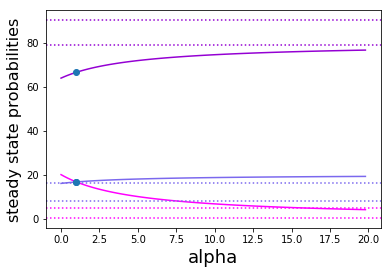

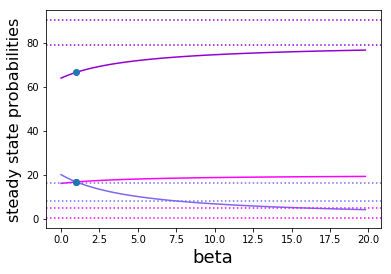

In [12]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 20, 100,endpoint =False)
betas = np.linspace(0, 20, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    if i ==1:
        alpha1 = aln
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        if j == 1:
            beta1 = bln
        
        T_expected_narrow = np.asarray([[4+i, 4+j, 4*(3+i+j)],
         [4+i, 4+j, 4*(3+i+j)],
                                       [4+i, 4+j, 4*(3+i+j)]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        a.append(evec_one[0])
        b.append(evec_one[1])
        c.append(evec_one[2])
    x1.append(a)
    x2.append(b)
    x3.append(c)
print(alpha1,beta1)
fig,ax = plt.subplots()
plt.plot(alphas, [x[beta1] for x in x1], c = cols[0], ls = '-')
plt.plot(alphas, [x[beta1] for x in x2], c = cols[1], ls = '-')
plt.plot(alphas, [x[beta1] for x in x3], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('alpha', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

fig,ax = plt.subplots()
plt.plot(betas, x1[alpha1], c = cols[0], ls = '-')
plt.plot(betas, x2[alpha1], c = cols[1], ls = '-')
plt.plot(betas, x3[alpha1], c =  cols[2], ls = '-')

plt.axhline(y=min(v1), c = cols[0], ls = ':')
plt.axhline(y=min(v2), c =  cols[1], ls = ':')
plt.axhline(y=min(v3), c = cols[2], ls = ':')
plt.axhline(y=max(v1), c = cols[0], ls = ':')
plt.axhline(y=max(v2), c =  cols[1], ls = ':')
plt.axhline(y=max(v3), c = cols[2], ls = ':')
plt.xlabel('beta', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1,1),(100/6,100/6,400/6), 'o')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


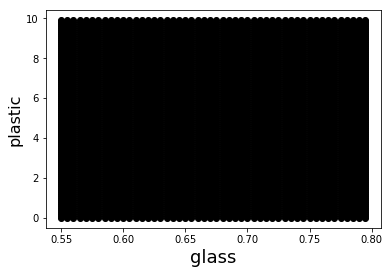

In [13]:
def mean(li):
    return(sum(li) / len(li))
def rang(li):
    return(abs(max(li)-min(li)))

alphas = np.linspace(0.55,0.8, 50,endpoint =False)
betas = np.linspace(0, 10, 100,endpoint =False)
x1 = []
x2 = []
x3 = []
tolerances = [ mean(v1),mean(v2),mean(v3)]
tols = [ rang(v1),rang(v2),rang(v3)]
for aln in range(len(alphas)):
    a = []
    b = []
    c = []
    i = alphas[aln]
    
    for bln in range(len(betas)):
    #print('\nalpha = %s' %i)
        j = betas[bln]
        
        p = (j*2/(18*(1+i+j)*(3+i))+
             4*2*(j+1)/(18*2*(3+i)*(1+i+j)*(2+i+j)))
        g = (i*2/(18*(1+i+j)*(3+j))+
             4*2*(i+1)/(18*2*(3+j)*(1+i+j)*(2+i+j)))
        m = (2*j*(i+1)/(18*(3+i)*(1+j+i))+
              8*(i+1)*(j+1)/(18*2*(3+j)*(i+j+1)*(i+j+2))+
              8*(j+1)*(i+1)/(18*2*(3+i)*(i+j+1)*(i+j+2))+
              i*2*(1+j)/(18*(3+j)*(1+i+j)))

        T_expected_narrow = np.asarray([[p, g, m],
                                        [p, g, m],
         [p, g, m]])
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        test = all(math.isclose(evec_one[i], tolerances[i], abs_tol = tols[i])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(i,j, c=col, marker='o')
        plt.xlabel('glass', fontsize=18)
        plt.ylabel('plastic', fontsize=16)